In [ ]:

!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"khushbooshali","key":"a00acb33fad6273db0b086d435b67b93"}'}

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle(1).json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(1).json ~/.kaggle/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle(1).json'


In [ ]:
!kaggle datasets download -d jessicali9530/kuc-hackathon-winter-2018

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018
License(s): other
 61% 25.0M/40.7M [00:00<00:00, 67.1MB/s]
100% 40.7M/40.7M [00:00<00:00, 91.9MB/s]


In [ ]:

from zipfile import ZipFile
file_name="kuc-hackathon-winter-2018.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance

!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
train = pd.read_csv('drugsComTrain_raw.csv')
test = pd.read_csv('drugsComTest_raw.csv')
train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
data = pd.concat([train, test])
data.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:

# describing the data

data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
# taking out information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [ ]:

# Dropping the data points with null values
data = data.dropna(how = 'any', axis = 0)
# lowercasing the column names so it will be easier for access ^^
data.columns = data.columns.str.lower()
# Sorting the dataframe
data.sort_values(['rating'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)
# Converting the date in to date time format
data['date'] = pd.to_datetime(data['date'])
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,213924,Tioconazole,Vaginal Yeast Infection,"""OMG! Only the 2nd YI I have ever had &amp; th...",1,2016-09-24,12
1,90417,Docosanol,Herpes Simplex,"""I woke up in the morning with redness at the ...",1,2017-02-16,19
2,208407,Oseltamivir,Influenza,"""Tamil the first day seemed to just make me na...",1,2015-12-21,10
3,101350,Aubra,Birth Control,"""I went on Aubra to 1. Avoid any accidents wit...",1,2016-08-19,0
4,56915,Ranitidine,Stomach Ulce,"""Didn&#039;t take away pain in 1 months""",1,2016-01-14,4
5,144594,Etonogestrel,Birth Control,"""Awful awful awful!!! Lost more than half of m...",1,2016-03-13,2
6,16136,Ethinyl estradiol / norethindrone,Menstrual Disorders,"""I&#039;m 41. My latest check up showed that I...",1,2016-05-02,2
7,154778,Metronidazole,Bacterial Infection,"""After a tooth infection, I was prescribed the...",1,2017-09-08,1
8,64313,Sertraline,Depression,"""This is about my woman who is on zoloft.........",1,2016-09-21,13
9,53559,Alesse,Birth Control,"""I hated this bcp. I gained 15 pounds in two w...",1,2017-01-03,4


In [ ]:

# Total unique conditions in the dataset
print (data['condition'].nunique(), "\n")

print ("some of the conditions are : ", data['condition'].unique()[0:10])

916 

some of the conditions are :  ['Vaginal Yeast Infection' 'Herpes Simplex' 'Influenza' 'Birth Control'
 'Stomach Ulce' 'Menstrual Disorders' 'Bacterial Infection' 'Depression'
 'Migraine Prevention' 'ADHD']


In [ ]:

#top 10 drugs with rating equals 10
data.loc[data['rating'] == 10, :]['drugname'].value_counts().head(10)


,count
drugname,
Levonorgestrel,1883
Phentermine,1079
Etonogestrel,864
Varenicline,662
Ethinyl estradiol / norethindrone,601
Escitalopram,596
Clonazepam,586
Alprazolam,565
Sertraline,550


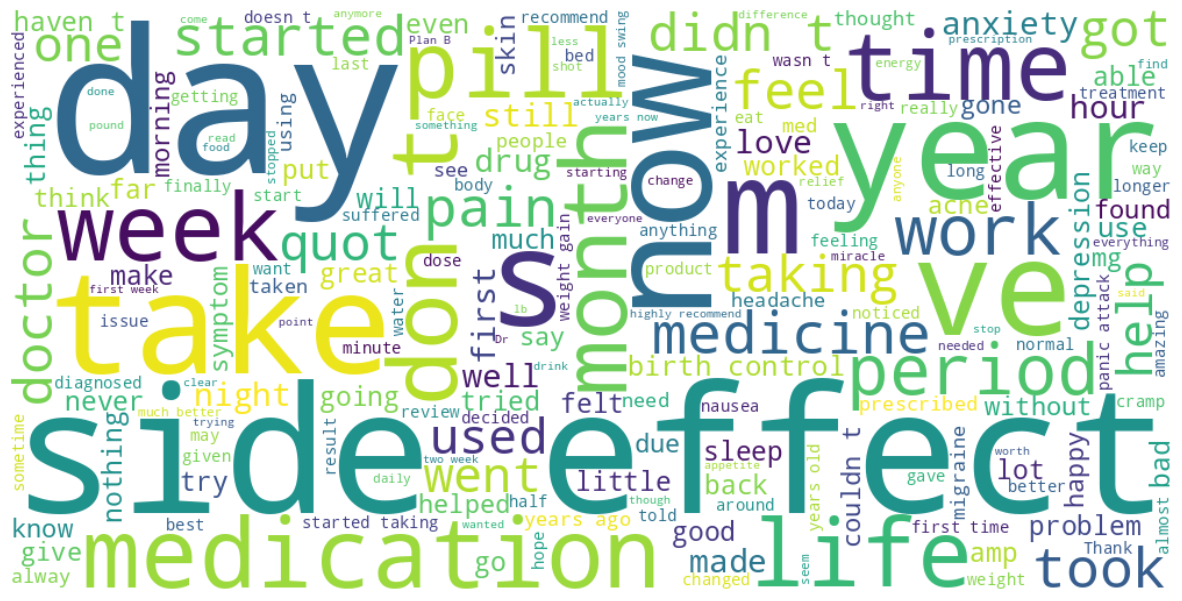

In [ ]:
# Word cloud of the reviews with rating equal to 10
#stopwords = set(STOPWORDS)

df_rate_ten = data.loc[data.rating == 10, 'review']
text = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

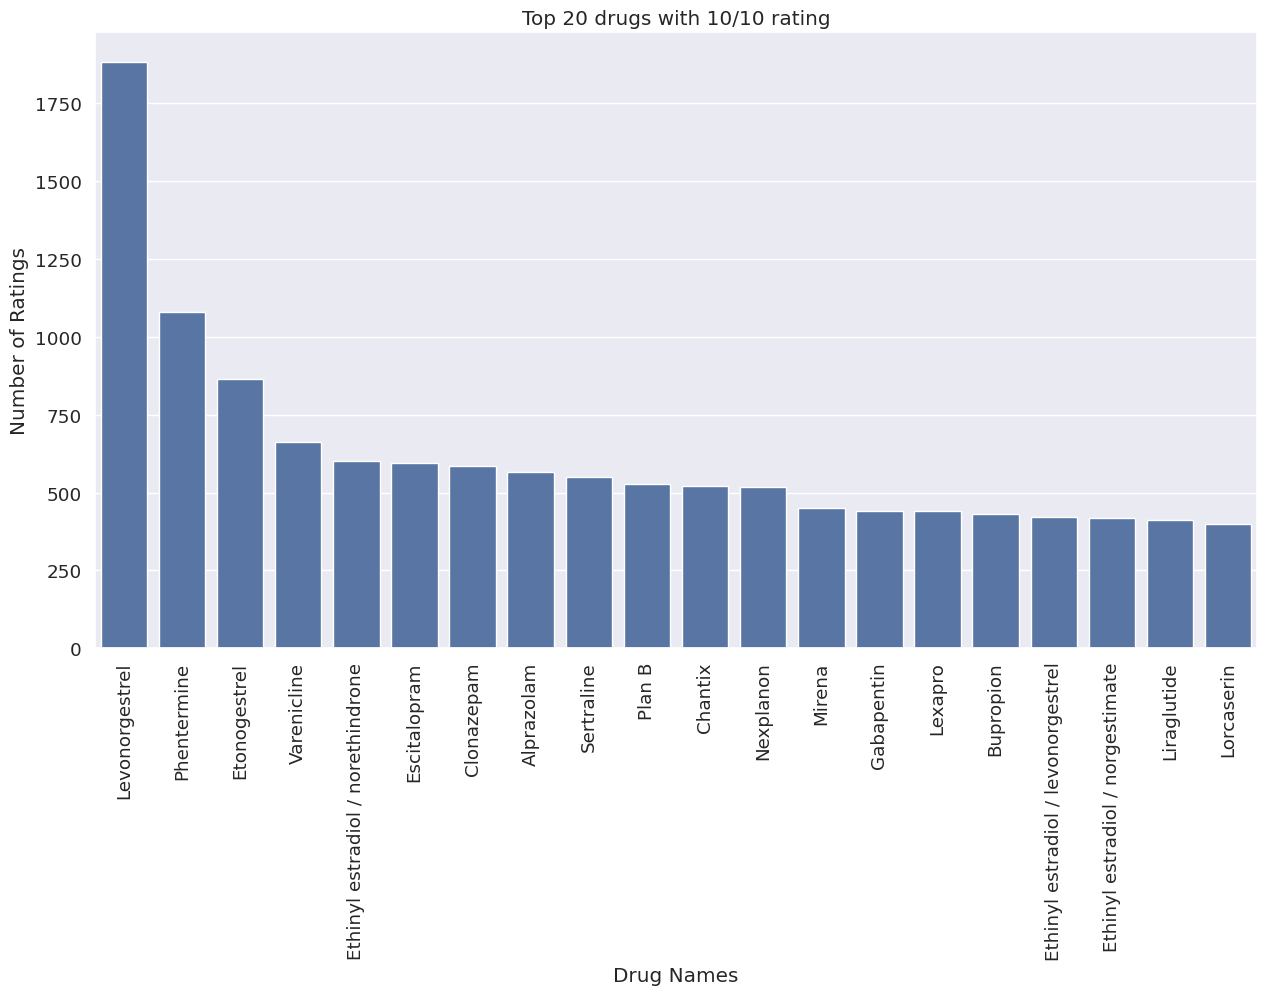

In [ ]:

# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

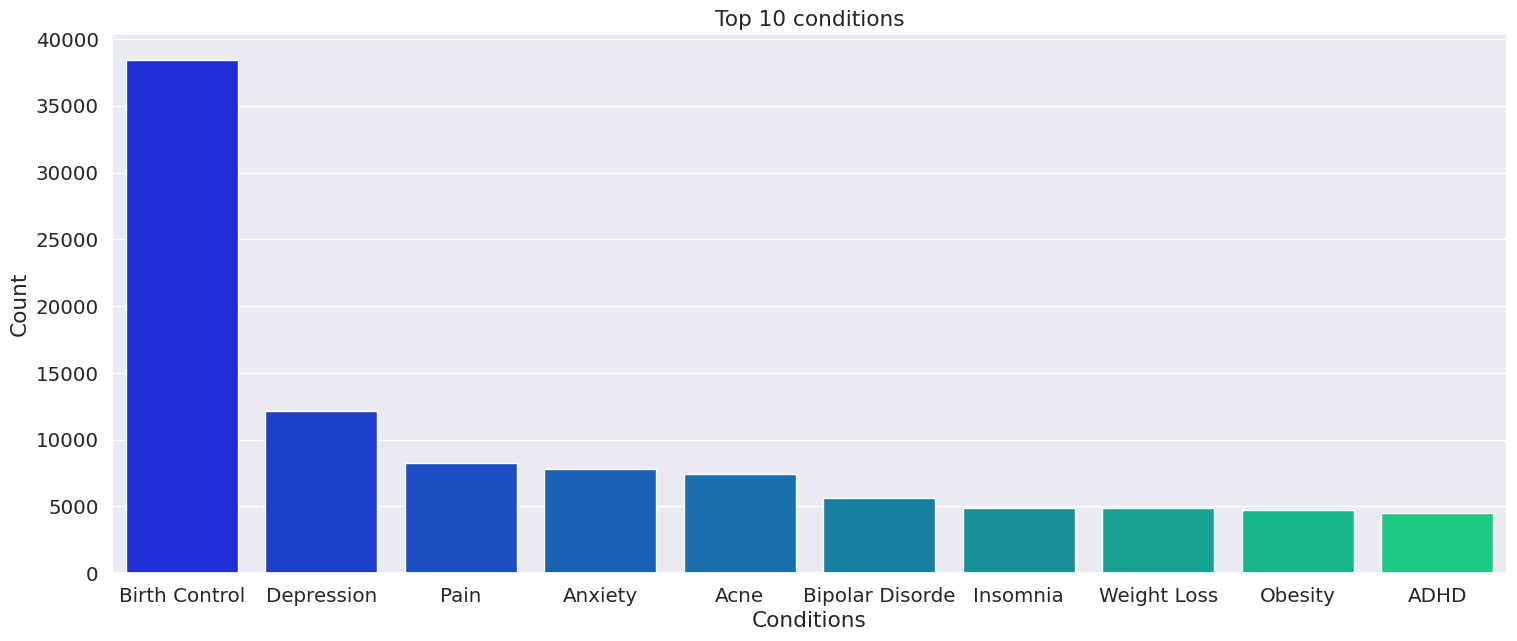

In [ ]:

# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

Text(0.5, 0, 'Rating')

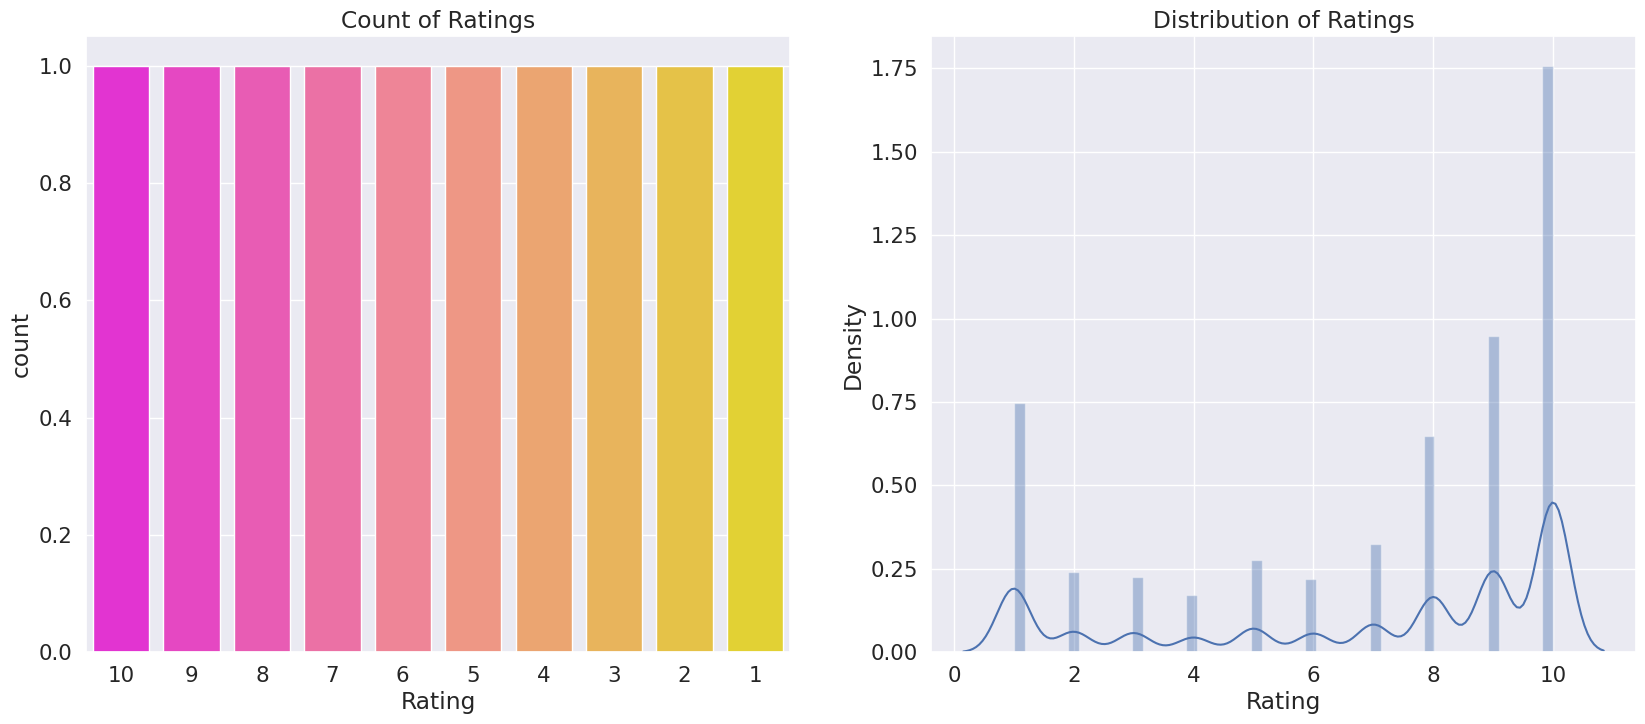

In [ ]:

import warnings
warnings.filterwarnings("ignore")
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

PREPROCESSING

In [ ]:

# Giving the Sentiment according to the ratings
import math
data['sentiment_rate'] = data['rating'].apply(lambda x: math.ceil(x/2))
data['sentiment_rate'].value_counts()

,count
sentiment_rate,
5,104181
1,37972
4,37379
3,19053
2,15284


In [ ]:
def review_clean(review):
    # changing review to lower cases.
    lower = review.str.lower()

    # Replacing the repeating pattern of '
    pattern_remove = lower.str.replace("'", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe


In [ ]:
!pip install contractions
import contractions

#applying the above assumptions into a column
data['review_clean'] = review_clean(data['review'])

# Expanding the contractions
data['review_clean'] = data['review_clean'].apply(lambda x: contractions.fix(x)) # Using contractions.fix to expand contractions

# Removing punctuations
data['review_clean'] = data['review_clean'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean
0,213924,Tioconazole,Vaginal Yeast Infection,"""OMG! Only the 2nd YI I have ever had &amp; th...",1,2016-09-24,12,1,omg only the 2nd yi i have ever had amp though...
1,90417,Docosanol,Herpes Simplex,"""I woke up in the morning with redness at the ...",1,2017-02-16,19,1,i woke up in the morning with redness at the s...
2,208407,Oseltamivir,Influenza,"""Tamil the first day seemed to just make me na...",1,2015-12-21,10,1,tamil the first day seemed to just make me nau...
3,101350,Aubra,Birth Control,"""I went on Aubra to 1. Avoid any accidents wit...",1,2016-08-19,0,1,i went on aubra to 1 avoid any accidents with ...
4,56915,Ranitidine,Stomach Ulce,"""Didn&#039;t take away pain in 1 months""",1,2016-01-14,4,1,didn039t take away pain in 1 months


In [ ]:
from textblob import TextBlob
"""I have used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned review"""
#from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

# Removing the stopwords from the review_clean column
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

# Separating the day, month and year from the Date

data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,213924,Tioconazole,Vaginal Yeast Infection,"""OMG! Only the 2nd YI I have ever had &amp; th...",1,2016-09-24,12,1,omg 2nd yi ever amp thought would tri instead ...,24,9,2016
1,90417,Docosanol,Herpes Simplex,"""I woke up in the morning with redness at the ...",1,2017-02-16,19,1,woke morn red site slight bump could tell woul...,16,2,2017
2,208407,Oseltamivir,Influenza,"""Tamil the first day seemed to just make me na...",1,2015-12-21,10,1,tamil first day seem make nauseat headach seco...,21,12,2015
3,101350,Aubra,Birth Control,"""I went on Aubra to 1. Avoid any accidents wit...",1,2016-08-19,0,1,went aubra 1 avoid accid partner 2 tri clear a...,19,8,2016
4,56915,Ranitidine,Stomach Ulce,"""Didn&#039;t take away pain in 1 months""",1,2016-01-14,4,1,didn039t take away pain 1 month,14,1,2016


In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
data['sentiment'] = sentiment(data['review'])

data['sentiment_clean'] = sentiment(data['review_clean'])

np.corrcoef(data['sentiment'], data['rating'])

np.corrcoef(data['sentiment_clean'], data['rating'])

array([[1.        , 0.23185224],
       [0.23185224, 1.        ]])

In [ ]:
!pip install contractions
import contractions

# Cleaning the reviews without removing the stop words and using snowball stemmer

data['review_clean_ss'] = review_clean(data['review'])

data['review_clean_ss'] = data['review_clean_ss'].apply(lambda x: contractions.fix(x)) # Use contractions.fix to expand contractions

data['review_clean_ss'] = data['review_clean_ss'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

np.corrcoef(data['sentiment_clean_ss'], data['rating'])

array([[1.        , 0.34463244],
       [0.34463244, 1.        ]])

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,213924,Tioconazole,Vaginal Yeast Infection,"""OMG! Only the 2nd YI I have ever had &amp; th...",1,2016-09-24,12,1,omg 2nd yi ever amp thought would tri instead ...,24,9,2016,-0.250000,-0.300000,omg only the 2nd yi i have ever had amp though...,-0.250000
1,90417,Docosanol,Herpes Simplex,"""I woke up in the morning with redness at the ...",1,2017-02-16,19,1,woke morn red site slight bump could tell woul...,16,2,2017,-0.106667,-0.016667,i woke up in the morning with redness at the s...,-0.106667
2,208407,Oseltamivir,Influenza,"""Tamil the first day seemed to just make me na...",1,2015-12-21,10,1,tamil first day seem make nauseat headach seco...,21,12,2015,-0.075000,0.183333,tamil the first day seemed to just make me nau...,-0.075000
3,101350,Aubra,Birth Control,"""I went on Aubra to 1. Avoid any accidents wit...",1,2016-08-19,0,1,went aubra 1 avoid accid partner 2 tri clear a...,19,8,2016,-0.070663,-0.037755,i went on aubra to 1 avoid any accidents with ...,-0.070663
4,56915,Ranitidine,Stomach Ulce,"""Didn&#039;t take away pain in 1 months""",1,2016-01-14,4,1,didn039t take away pain 1 month,14,1,2016,0.000000,0.000000,didn039t take away pain in 1 months,0.000000


In [ ]:
# Calculating weighted ratings
# Formula : (R*v + C*m)/(v+m)
# R - data['rating']
# v - data['usefulcount']
# C (mean rating for entire dataset) - data['rating'].mean()
# m (least # of votes/usefulcount required to be accepted in 70 percentile) - data['usefulcount'].quantile(0.70)

# Calculating C
C=int(data['rating'].mean())

#Calculating m
m = data['usefulcount'].quantile(0.70)
m

31.0

In [ ]:
data['weighted_rating'] = ((data['rating']*data['usefulcount']) + (C*m))/(data['usefulcount']+m)

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss,weighted_rating
0,213924,Tioconazole,Vaginal Yeast Infection,"""OMG! Only the 2nd YI I have ever had &amp; th...",1,2016-09-24,12,1,omg 2nd yi ever amp thought would tri instead ...,24,9,2016,-0.250000,-0.300000,omg only the 2nd yi i have ever had amp though...,-0.250000,4.604651
1,90417,Docosanol,Herpes Simplex,"""I woke up in the morning with redness at the ...",1,2017-02-16,19,1,woke morn red site slight bump could tell woul...,16,2,2017,-0.106667,-0.016667,i woke up in the morning with redness at the s...,-0.106667,4.100000
2,208407,Oseltamivir,Influenza,"""Tamil the first day seemed to just make me na...",1,2015-12-21,10,1,tamil first day seem make nauseat headach seco...,21,12,2015,-0.075000,0.183333,tamil the first day seemed to just make me nau...,-0.075000,4.780488
3,101350,Aubra,Birth Control,"""I went on Aubra to 1. Avoid any accidents wit...",1,2016-08-19,0,1,went aubra 1 avoid accid partner 2 tri clear a...,19,8,2016,-0.070663,-0.037755,i went on aubra to 1 avoid any accidents with ...,-0.070663,6.000000
4,56915,Ranitidine,Stomach Ulce,"""Didn&#039;t take away pain in 1 months""",1,2016-01-14,4,1,didn039t take away pain 1 month,14,1,2016,0.000000,0.000000,didn039t take away pain in 1 months,0.000000,5.428571


In [ ]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

data['mean_word_len'] = data['mean_word_len'].fillna((data['mean_word_len'].mean()))

In [ ]:
data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'day', 'month', 'year',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'weighted_rating', 'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

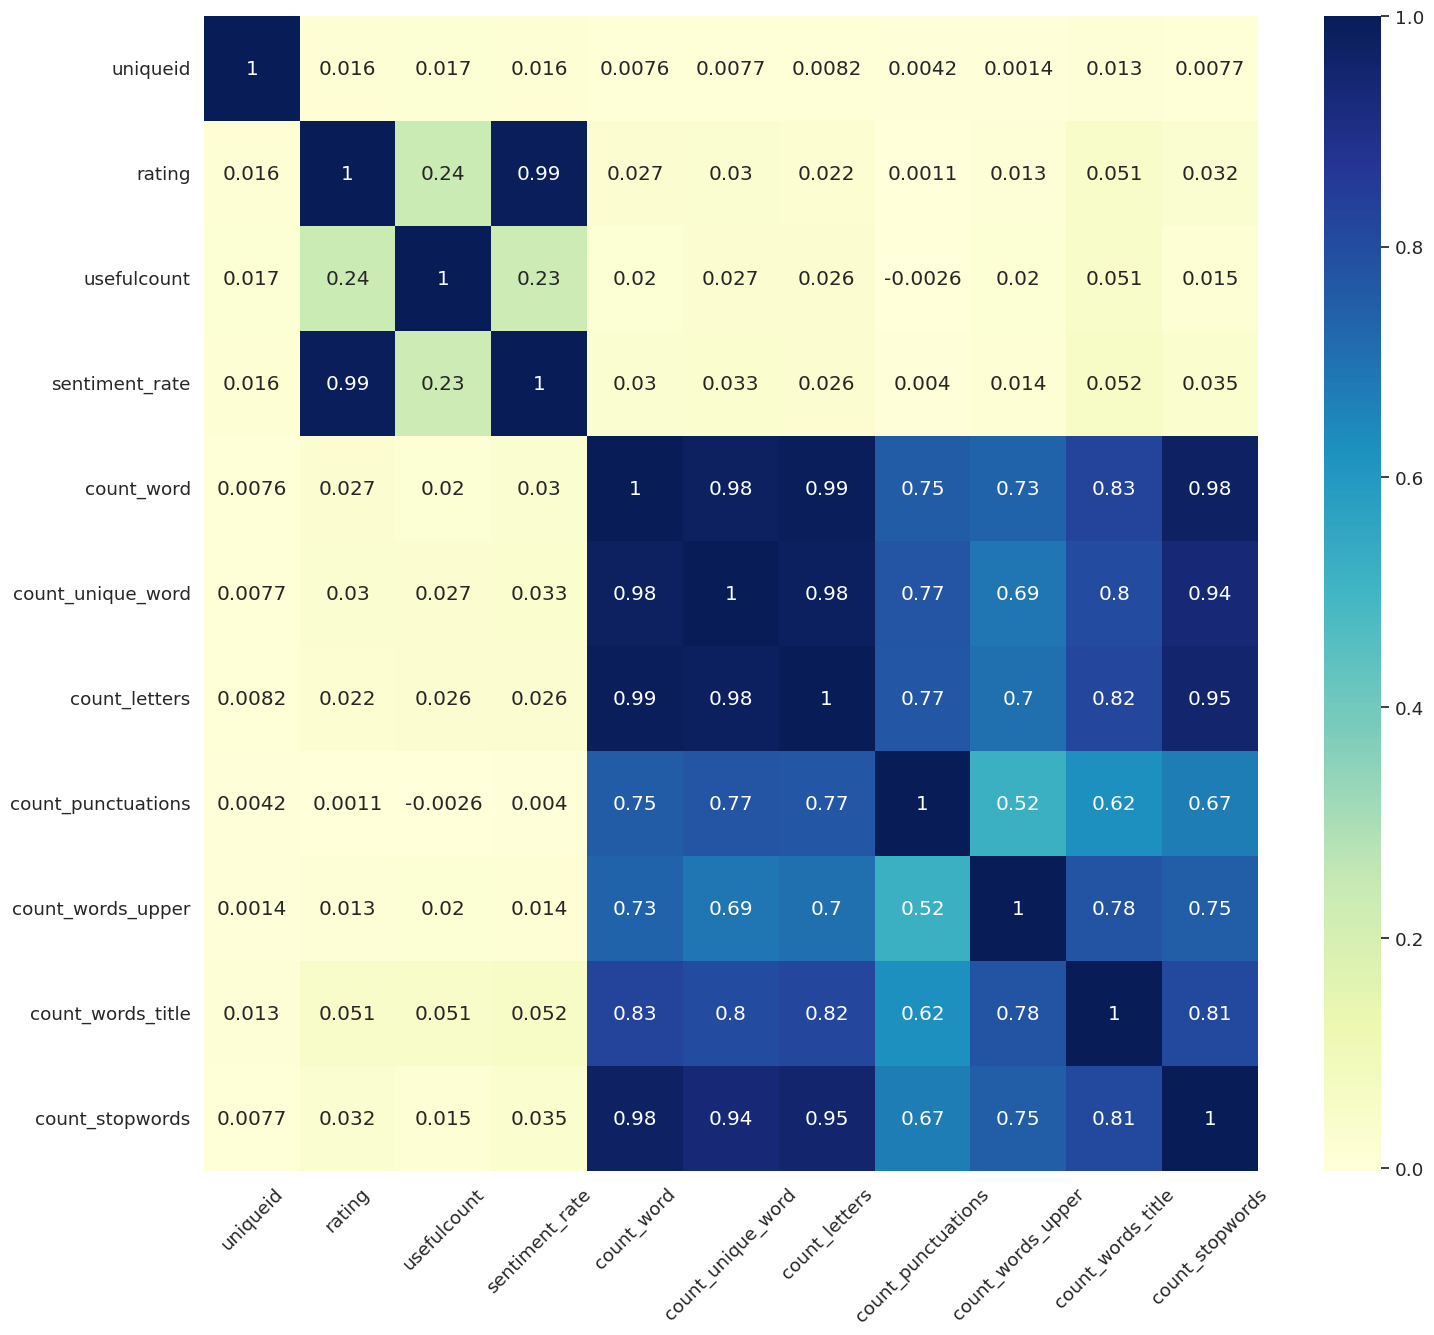

In [ ]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);


In [ ]:
# Label Encoding Drugname and Conditions
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [ ]:
#Print plot overviews of the first 5 movies.
data['review_clean_ss'].head()

,review_clean_ss
0,omg only the 2nd yi i have ever had amp though...
1,i woke up in the morning with redness at the s...
2,tamil the first day seemed to just make me nau...
3,i went on aubra to 1 avoid any accidents with ...
4,didn039t take away pain in 1 months


In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['review_clean_ss'] = data['review_clean_ss'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['review_clean_ss'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(213869, 89615)

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['review_clean_ss'] = data['review_clean_ss'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['review_clean_ss'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

#Array mapping from feature integer indices to feature name.
# Use get_feature_names_out() instead of get_feature_names()
tfidf.get_feature_names_out()[5000:5010]

array(['206lbs', '206the', '207', '2074lbs', '2075mcg', '2078', '207lb',
       '207lbs', '208', '20800'], dtype=object)

MODELS

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Load the training and testing data
train_data = pd.read_csv('drugsComTrain_raw.csv')
test_data = pd.read_csv('drugsComTest_raw.csv')

# Combine the data for preprocessing
data = pd.concat([train_data, test_data], ignore_index=True)

# Label Encoding for 'drugname' and 'condition'
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

# Replace NaN with an empty string in 'review' column
data['review'] = data['review'].fillna('')

# TF-IDF Vectorization for 'review' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['review'])

# Separate the data back into training and testing sets
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]

# Defining Features and splitting the data as train and test set
features = train_data[['condition', 'usefulCount', 'rating', 'date',
                   'review', 'drugName']]

target = train_data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (120972, 6)
The Test set size  (40325, 6)


MODEL I-LightGBM

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
!pip install lightgbm
from lightgbm import LGBMClassifier #Import the LGBMClassifier class from lightgbm


# Load the training and testing data
train_data = pd.read_csv('drugsComTrain_raw.csv')
test_data = pd.read_csv('drugsComTest_raw.csv')

# Combine the data for preprocessing
data = pd.concat([train_data, test_data], ignore_index=True)

# Label Encoding for 'drugname' and 'condition'
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

# Replace NaN with an empty string in 'review' column
data['review'] = data['review'].fillna('')

# TF-IDF Vectorization for 'review' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['review'])

# Separate the data back into training and testing sets
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]

# Defining Features and splitting the data as train and test set
features = train_data[['condition', 'usefulCount', 'rating', 'date',
                   'review', 'drugName']]

target = train_data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


The Train set size  (120972, 6)
The Test set size  (40325, 6)


In [ ]:
#Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
!pip install lightgbm
from lightgbm import LGBMClassifier #Import the LGBMClassifier class from lightgbm
from sklearn.metrics import accuracy_score #Import accuracy_score


# Load the training and testing data
train_data = pd.read_csv('drugsComTrain_raw.csv')
test_data = pd.read_csv('drugsComTest_raw.csv')

# Combine the data for preprocessing
data = pd.concat([train_data, test_data], ignore_index=True)

# Label Encoding for 'drugname' and 'condition'
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

# Replace NaN with an empty string in 'review' column
data['review'] = data['review'].fillna('')

# TF-IDF Vectorization for 'review' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['review'])

# Separate the data back into training and testing sets
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]

# Defining Features and splitting the data as train and test set
features = train_data[['condition', 'usefulCount', 'rating', 'date',
                   'review', 'drugName']]

target = train_data['rating']

X_train, X_test

(        condition  usefulCount  rating       date  \
 56300         103           10       9  30-Nov-16   
 91115         175           19       8   7-Dec-13   
 4658          134          102       7   1-Sep-14   
 26163         273           25       9   3-Sep-17   
 122972        701            8       5  28-Apr-16   
 ...           ...          ...     ...        ...   
 119879        522           19       8  31-Dec-16   
 103694        103            3       9  19-Apr-17   
 131932        264            5       6  19-Sep-16   
 146867        454            3       7  29-May-09   
 121958        464           24       1  13-Feb-16   
 
                                                    review  drugName  
 56300   "I would just like to add a positive review in...       669  
 91115   "I have been taking Gianvi for 9 months now. T...      1098  
 4658    "I&#039;m a 25 year old female and my doctor p...       732  
 26163   "Dopamine and norepinephrine are two major bra...      35

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
!pip install lightgbm
from lightgbm import LGBMClassifier #Import the LGBMClassifier class from lightgbm
from sklearn.metrics import accuracy_score, classification_report #Import accuracy_score and classification_report


# Load the training and testing data
# ... (rest of your code)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 120972, number of used features: 4
[LightGBM] [Info] Start training from score -2.011104
[LightGBM] [Info] Start training from score -3.149018
[LightGBM] [Info] Start training from score -3.217405
[LightGBM] [Info] Start training from score -3.456356
[LightGBM] [Info] Start training from score -2.997983
[LightGBM] [Info] Start training from score -3.249061
[LightGBM] [Info] Start training from score -2.843525
[LightGBM] [Info] Start training from score -2.141402
[LightGBM] [Info] Start training from score -1.762098
[LightGBM] [Info] Start training from score -1.153378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

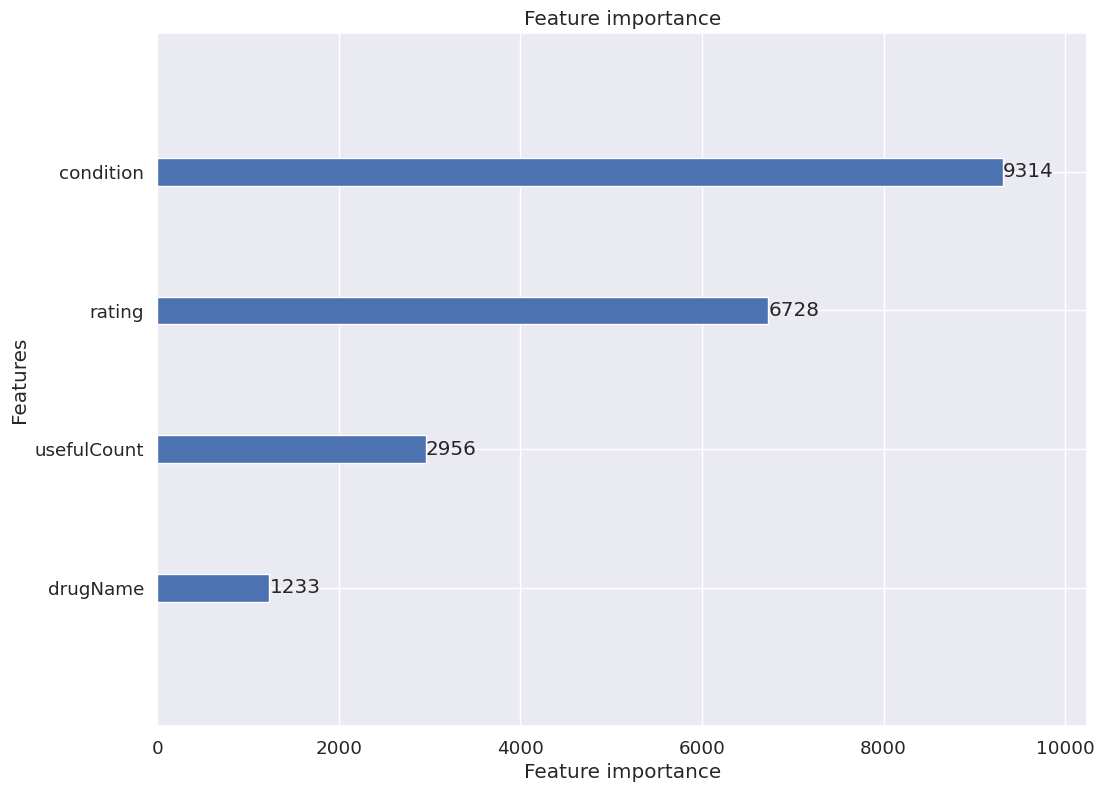

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
!pip install lightgbm
from lightgbm import LGBMClassifier, plot_importance #Import the LGBMClassifier class from lightgbm
from sklearn.metrics import accuracy_score, classification_report #Import accuracy_score and classification_report
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting
import seaborn as sns # Import seaborn for enhanced visuals

# Load the training and testing data
train_data = pd.read_csv('drugsComTrain_raw.csv')
test_data = pd.read_csv('drugsComTest_raw.csv')

# Combine the data for preprocessing
data = pd.concat([train_data, test_data], ignore_index=True)

# Label Encoding for 'drugname' and 'condition'
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

# Replace NaN with an empty string in 'review' column
data['review'] = data['review'].fillna('')

# TF-IDF Vectorization for 'review' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['review'])

# Separate the data back into training and testing sets
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]

# Defining Features and splitting the data as train and test set
features = train_data[['condition', 'usefulCount', 'rating', 'date',
                   'review', 'drugName']]

target = train_data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

# Create and train the LGBMClassifier model
model = LGBMClassifier() # Create an instance of the LGBMClassifier
model.fit(X_train[['condition', 'usefulCount', 'rating', 'drugName']], y_train) # Train the model # Assuming these are your numerical features


# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model); # Assuming 'model' is a trained LGBMClassifier object

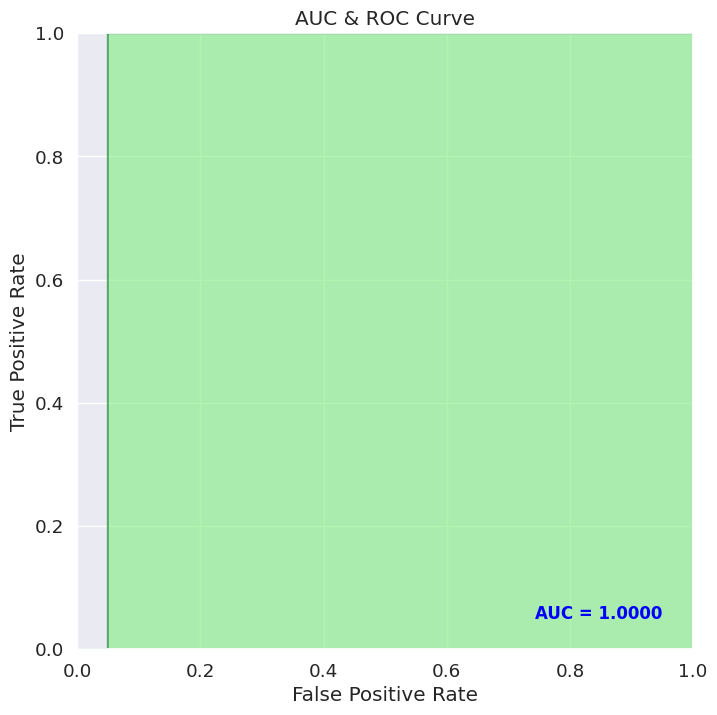

In [ ]:
from sklearn import metrics
# Get predictions from the trained model
# Use predict_proba to get probabilities instead of predicted class labels
predictions = model.predict_proba(X_test[['condition', 'usefulCount', 'rating', 'drugName']])

# Specify 'multi_class' parameter for roc_auc_score
# 'ovr' (One-vs-Rest) or 'ovo' (One-vs-One)
auc = metrics.roc_auc_score(y_test, predictions, multi_class='ovr')

# For roc_curve, you need to specify the positive class (pos_label)
# Assuming 1 is the positive class label
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, predictions[:, 1], pos_label=1)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,predictions, multi_class='ovr')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Get predicted class labels using predict instead of predict_proba
predictions = model.predict(X_test[['condition', 'usefulCount', 'rating', 'drugName']])

# Now, predictions will contain discrete class labels
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5428
           2       1.00      1.00      1.00      1742
           3       1.00      1.00      1.00      1667
           4       1.00      1.00      1.00      1196
           5       1.00      1.00      1.00      1978
           6       1.00      1.00      1.00      1648
           7       1.00      1.00      1.00      2413
           8       1.00      1.00      1.00      4677
           9       1.00      1.00      1.00      6762
          10       1.00      1.00      1.00     12814

    accuracy                           1.00     40325
   macro avg       1.00      1.00      1.00     40325
weighted avg       1.00      1.00      1.00     40325



MODEL II - LogisticRegression

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# !pip install lightgbm # Assuming lightgbm is already installed
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# ... (rest of your code for loading and preprocessing data) ...

# Defining Features and splitting the data as train and test set
features = train_data[['condition', 'usefulCount', 'rating', 'date',
                   'review', 'drugName']]

target = train_data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Convert 'date' column to datetime objects
X_train['date'] = pd.to_datetime(X_train['date'])
X_test['date'] = pd.to_datetime(X_test['date'])

# Extract numerical features from the 'date' column
# For example, you can extract year, month, and day
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day

# Now you can drop the original 'date' column
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)
# ... (rest of your code for model training and evaluation) ...

# Assuming 'condition', 'usefulCount', 'rating', and 'drugName' are numerical features
# You should include the new date-related features in your training and testing data
LR = LogisticRegression(solver="liblinear").fit(X_train[['condition', 'usefulCount', 'rating', 'drugName', 'year', 'month', 'day']], y_train)

# Make predictions using the updated features
predictions_5 = LR.predict(X_test[['condition', 'usefulCount', 'rating', 'drugName', 'year', 'month', 'day']])

# ... (rest of your code) ...

<ipython-input-14-ddda3affc318>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train['date'] = pd.to_datetime(X_train['date'])
<ipython-input-14-ddda3affc318>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test['date'] = pd.to_datetime(X_test['date'])


In [ ]:
# Assuming you have already trained your model and want to get predictions
# Replace 'model' with your actual trained model object
predictions_2 = LR.predict(X_test[['condition', 'usefulCount', 'rating', 'drugName', 'year', 'month', 'day']]) # Assuming LR is your Logistic Regression model

# Now you can use predictions_2 in your classification_report
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5428
           2       0.78      0.97      0.87      1742
           3       0.95      0.21      0.35      1667
           4       0.00      0.00      0.00      1196
           5       0.00      0.00      0.00      1978
           6       0.00      0.00      0.00      1648
           7       0.00      0.00      0.00      2413
           8       0.00      0.00      0.00      4677
           9       0.49      1.00      0.66      6762
          10       1.00      1.00      1.00     12814

    accuracy                           0.67     40325
   macro avg       0.42      0.42      0.39     40325
weighted avg       0.61      0.67      0.61     40325



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MODEL III - XGBBoost

In [ ]:
# Defining Features and splitting the data as train and test set
features = train_data[['condition', 'usefulCount', 'rating', 'date',
                   'review', 'drugName']] # 'review' column included here

target = train_data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# ... rest of your code ...

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# ... (rest of your code for loading and preprocessing data) ...

# Defining Features and splitting the data as train and test set
# Using only 'usefulCount' and 'rating' features
features = train_data[['usefulCount', 'rating']]

target = train_data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# ... (rest of your code for data preprocessing) ...

# Logistic Regression with limited features
LR = LogisticRegression(solver="liblinear").fit(X_train, y_train)

# Make predictions using the updated features
predictions = LR.predict(X_test)

print(classification_report(y_test, predictions))
print("The Accuracy of the model on testing data is : ", accuracy_score(y_test, predictions), '\n')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5428
           2       0.79      1.00      0.88      1742
           3       0.00      0.00      0.00      1667
           4       0.00      0.00      0.00      1196
           5       0.00      0.00      0.00      1978
           6       0.00      0.00      0.00      1648
           7       0.00      0.00      0.00      2413
           8       0.00      0.00      0.00      4677
           9       0.49      1.00      0.66      6762
          10       1.00      1.00      1.00     12814

    accuracy                           0.66     40325
   macro avg       0.33      0.40      0.35     40325
weighted avg       0.57      0.66      0.60     40325

The Accuracy of the model on testing data is :  0.6632610043397397 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


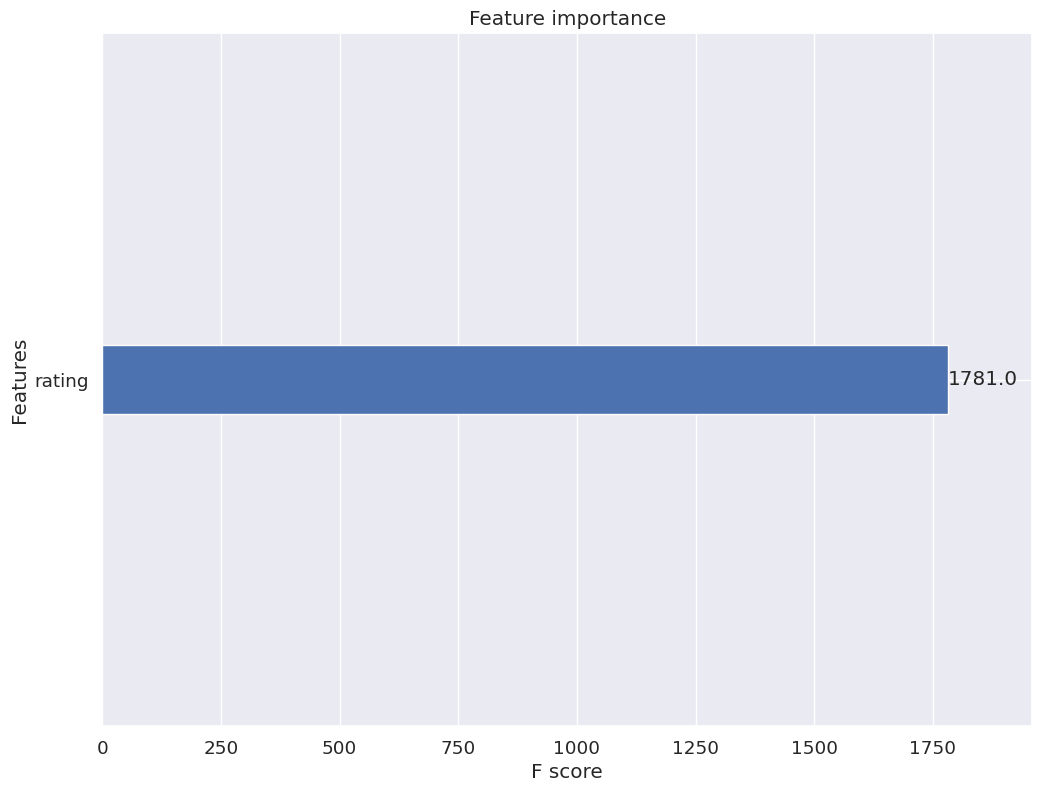

In [ ]:
# Feature Importance Plot using XGBClassifier
from xgboost import plot_importance # plot_importance for xgboost
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

MODEL IV - CatBoostClassifier

In [ ]:
# Training Model - III
!pip install catboost
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(iterations = 100,
                            learning_rate = 0.5,
                            cat_features=['review']) # Explicitly tell CatBoost that 'review' is categorical

model_cat = cat_clf.fit(X_train, y_train);

0:	learn: 0.3072672	total: 787ms	remaining: 1m 17s
1:	learn: 0.1011508	total: 1.51s	remaining: 1m 14s
2:	learn: 0.0601085	total: 2.19s	remaining: 1m 10s
3:	learn: 0.0384663	total: 2.85s	remaining: 1m 8s
4:	learn: 0.0247660	total: 3.53s	remaining: 1m 7s
5:	learn: 0.0160622	total: 4.19s	remaining: 1m 5s
6:	learn: 0.0110315	total: 4.88s	remaining: 1m 4s
7:	learn: 0.0072325	total: 5.51s	remaining: 1m 3s
8:	learn: 0.0046751	total: 6.17s	remaining: 1m 2s
9:	learn: 0.0032784	total: 7.27s	remaining: 1m 5s
10:	learn: 0.0023968	total: 8.45s	remaining: 1m 8s
11:	learn: 0.0016487	total: 9.55s	remaining: 1m 10s
12:	learn: 0.0011176	total: 10.8s	remaining: 1m 12s
13:	learn: 0.0007750	total: 11.5s	remaining: 1m 10s
14:	learn: 0.0005774	total: 12.2s	remaining: 1m 8s
15:	learn: 0.0004529	total: 12.9s	remaining: 1m 7s
16:	learn: 0.0003581	total: 13.5s	remaining: 1m 5s
17:	learn: 0.0002936	total: 14.2s	remaining: 1m 4s
18:	learn: 0.0002290	total: 14.9s	remaining: 1m 3s
19:	learn: 0.0001866	total: 15.6s	r

In [ ]:
# Training Model - III
!pip install catboost
from catboost import CatBoostClassifier

# Assuming 'review' is a column in your original train_data
# Get the index of the 'review' column within the subset of columns used for training
cat_features_indices = [X_train.columns.get_loc('review')]  # Use X_train.columns instead of train_data.columns

cat_clf = CatBoostClassifier(iterations=100,
                            learning_rate=0.5,
                            cat_features=cat_features_indices)  # Use the index instead of column name

# Ensure X_train contains only the required columns before getting the index
X_train, X_test, y_train, y_test = train_test_split(
    train_data[['usefulCount', 'rating', 'review']],  # Include 'review' in features
    target,
    test_size=0.25,
    random_state=42
)

model_cat = cat_clf.fit(X_train, y_train);

# ... (rest of your code) ...

# Predictions
predictions_3 = model_cat.predict(X_test)  # X_test now contains 'review' as well
# ... (rest of your code) ...

0:	learn: 0.3265379	total: 616ms	remaining: 1m
1:	learn: 0.0708888	total: 1.24s	remaining: 1m
2:	learn: 0.0425062	total: 1.88s	remaining: 1m
3:	learn: 0.0268088	total: 2.44s	remaining: 58.5s
4:	learn: 0.0176061	total: 3.02s	remaining: 57.3s
5:	learn: 0.0123122	total: 3.57s	remaining: 56s
6:	learn: 0.0079971	total: 4.15s	remaining: 55.1s
7:	learn: 0.0050957	total: 4.7s	remaining: 54.1s
8:	learn: 0.0034414	total: 5.29s	remaining: 53.5s
9:	learn: 0.0025556	total: 5.91s	remaining: 53.2s
10:	learn: 0.0017822	total: 6.5s	remaining: 52.6s
11:	learn: 0.0012966	total: 7.1s	remaining: 52.1s
12:	learn: 0.0008839	total: 7.85s	remaining: 52.6s
13:	learn: 0.0006551	total: 8.89s	remaining: 54.6s
14:	learn: 0.0005276	total: 9.89s	remaining: 56.1s
15:	learn: 0.0003994	total: 10.9s	remaining: 57.3s
16:	learn: 0.0003008	total: 11.9s	remaining: 58.3s
17:	learn: 0.0002370	total: 12.6s	remaining: 57.4s
18:	learn: 0.0002045	total: 13.2s	remaining: 56.2s
19:	learn: 0.0001703	total: 13.7s	remaining: 55s
20:	le

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming 'predictions' contains a single prediction for each sample
# and not probabilities for multiple classes, we don't need argmax

# 'predictions' likely already contains the predicted labels
predicted_labels = predictions.astype(int)  # Convert to integers if necessary

# Now use predicted_labels in classification_report
print ("**********TRAINING SCORE********** : \n",classification_report(y_test, predicted_labels),'\n')
print ("**********TESTING SCORE********** : \n",classification_report(y_test, predictions_3))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**********TRAINING SCORE********** : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5428
           2       0.79      1.00      0.88      1742
           3       0.00      0.00      0.00      1667
           4       0.00      0.00      0.00      1196
           5       0.00      0.00      0.00      1978
           6       0.00      0.00      0.00      1648
           7       0.00      0.00      0.00      2413
           8       0.00      0.00      0.00      4677
           9       0.49      1.00      0.66      6762
          10       1.00      1.00      1.00     12814

    accuracy                           0.66     40325
   macro avg       0.33      0.40      0.35     40325
weighted avg       0.57      0.66      0.60     40325
 

**********TESTING SCORE********** : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5428
           2       1.00      1.00      1.00      1742

MODEL V - Naive Bayes Classifier

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split  # Import train_test_split

# Assuming 'train_data' and 'target' are your original data and target variable
# Select only numerical features for Gaussian Naive Bayes
X_train_numerical = train_data[['usefulCount', 'rating']]  # Exclude 'review'

# Split the data into training and testing sets using only numerical features
X_train, X_test, y_train, y_test = train_test_split(
    X_train_numerical,
    target,
    test_size=0.25,
    random_state=42
)

# instantiate the model
gnb = GaussianNB()

# fit the model using only numerical features
model_gnb = gnb.fit(X_train, y_train)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split  # Import train_test_split

# Assuming 'train_data' and 'target' are your original data and target variable
# Select only numerical features for Gaussian Naive Bayes
X_train_numerical = train_data[['usefulCount', 'rating']]  # Exclude 'review'

# Split the data into training and testing sets using only numerical features
X_train, X_test, y_train, y_test = train_test_split(
    X_train_numerical,
    target,
    test_size=0.25,
    random_state=42
)

# instantiate the model
gnb = GaussianNB()

# fit the model using only numerical features
model_gnb = gnb.fit(X_train, y_train)


# Ensure X_test has the same columns as used during training
X_test = X_test[['usefulCount', 'rating']] # Selecting the same columns used in training


predictions_5 = model_gnb.predict(X_test)
print ("The Accuracy of the testing model is : ", accuracy_score(y_test, predictions_5), '\n')
predictions_51 = model_gnb.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_51), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_5), '\n')

print (classification_report(y_test, predictions_5))

The Accuracy of the testing model is :  1.0 

The Accuracy of the model on training data is :  1.0 

The confusion Matrix is 

[[ 5428     0     0     0     0     0     0     0     0     0]
 [    0  1742     0     0     0     0     0     0     0     0]
 [    0     0  1667     0     0     0     0     0     0     0]
 [    0     0     0  1196     0     0     0     0     0     0]
 [    0     0     0     0  1978     0     0     0     0     0]
 [    0     0     0     0     0  1648     0     0     0     0]
 [    0     0     0     0     0     0  2413     0     0     0]
 [    0     0     0     0     0     0     0  4677     0     0]
 [    0     0     0     0     0     0     0     0  6762     0]
 [    0     0     0     0     0     0     0     0     0 12814]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5428
           2       1.00      1.00      1.00      1742
           3       1.00      1.00      1.00      1667
           4       1.00

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions_5)))


Model accuracy score: 0.6709


Grid Search Optimization on ANN

Fitting 2 folds for each of 6 candidates, totalling 12 fits


Best Parameters:  {'batch_size': 16, 'epochs': 10}
Best Accuracy:  0.25
Test Accuracy:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



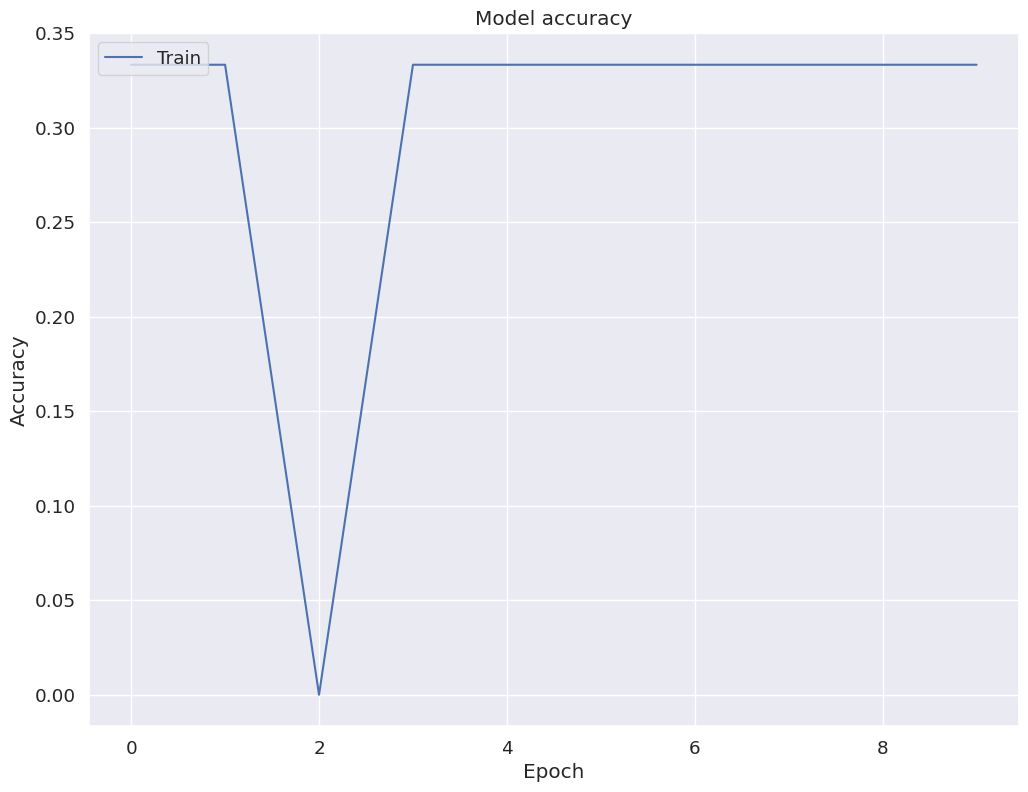

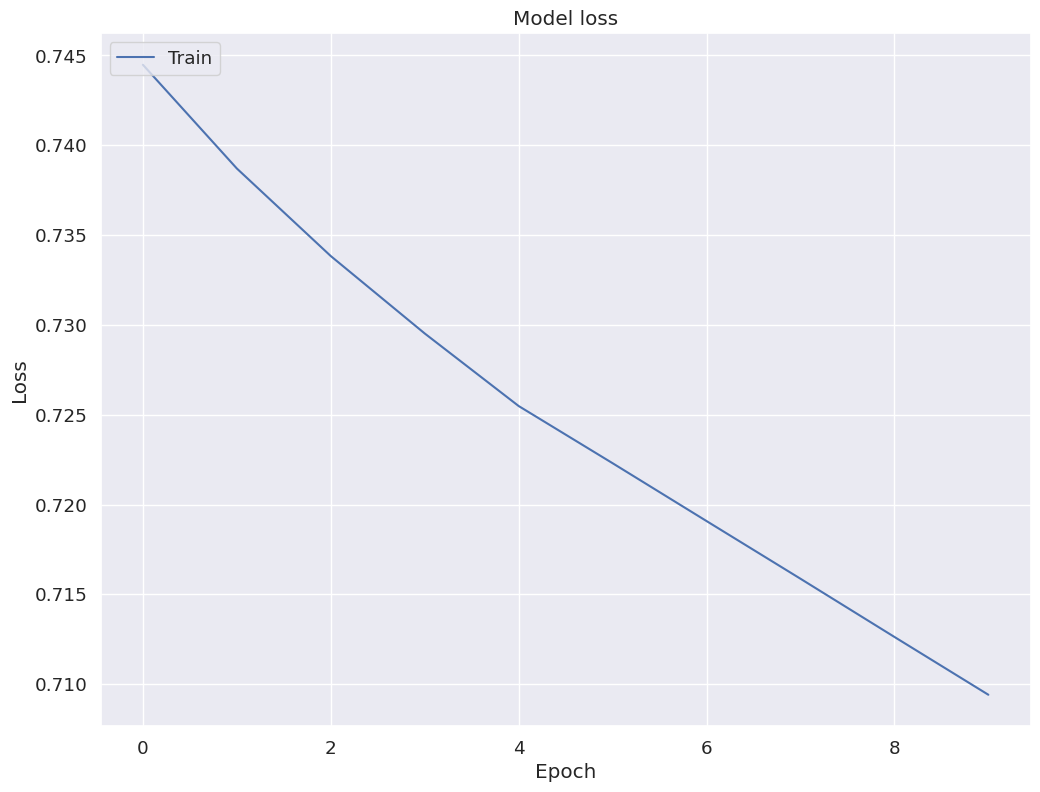

In [ ]:
!pip install scikeras matplotlib
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  # import KFold for alternative CV
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier  # Import from scikeras
import matplotlib.pyplot as plt

# Load or define X and y here:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # Replace with your actual data
y = np.array([0, 1, 0, 1])  # Replace with your actual target variable data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the ANN model
def create_model(optimizer='adam', activation='relu', neurons=32, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in KerasClassifier, passing model parameters here
model = KerasClassifier(
    build_fn=create_model,
    optimizer='adam',  # Pass optimizer here
    activation='relu',  # Pass activation here
    neurons=32,        # Pass neurons here
    dropout_rate=0.0,   # Pass dropout_rate here
    verbose=0
)

# Define the hyperparameter grid - only training parameters here
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20],
}

# Initialize GridSearchCV with KFold for smaller datasets
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1)  # Reduced cv to 2

# Perform the grid search
grid_result = grid.fit(X_train, y_train)

# Best hyperparameters and results
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

# Evaluate on the test set
best_model = grid_result.best_estimator_
y_pred = (best_model.predict(X_test) > 0.5).astype(int)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot training history
history = best_model.history_  # Get training history from the best model
plt.plot(history['accuracy'])
#plt.plot(history['val_accuracy']) # If you have validation data
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left') #, 'Validation'
plt.show()

plt.plot(history['loss'])
#plt.plot(history['val_loss']) # If you have validation data
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left') #, 'Validation'
plt.show()

Metrics used to evaluate the models:

1. Accuracy
2. Precision Recall Curve
3. Recall
4. F1-score
5. Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `best_model` is the trained model from the grid search
# Assuming `X_test` and `y_test` are the test dataset features and true labels

# Predict probabilities
y_pred_prob = best_model.predict(X_test)

# Convert probabilities to binary predictions (threshold = 0.5 for binary classification)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Precision Graph

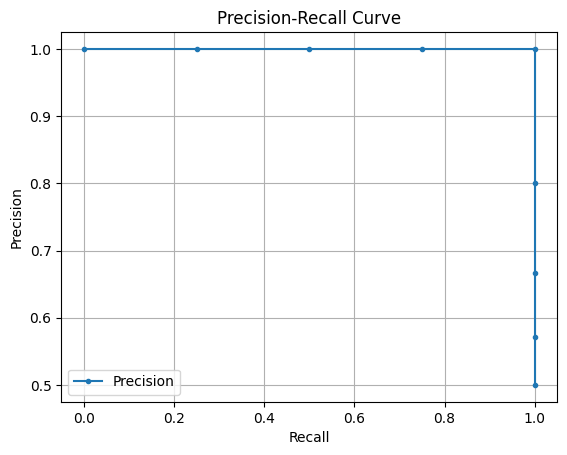

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, precision_recall_curve


def plot_precision_curve(y_true, y_pred_prob):
    """Plots the precision curve for binary classification.

    Args:
        y_true (array-like): True binary labels (0 or 1).
        y_pred_prob (array-like): Predicted probabilities for the positive class.
    """

    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)

    plt.plot(recall, precision, marker='.', label='Precision')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage:
# Assuming you have y_true (true labels) and y_pred_prob (predicted probabilities)
y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1])
y_pred_prob = np.array([0.2, 0.8, 0.3, 0.9, 0.7, 0.1, 0.4, 0.6])

plot_precision_curve(y_true, y_pred_prob)

Recall Curve Graph

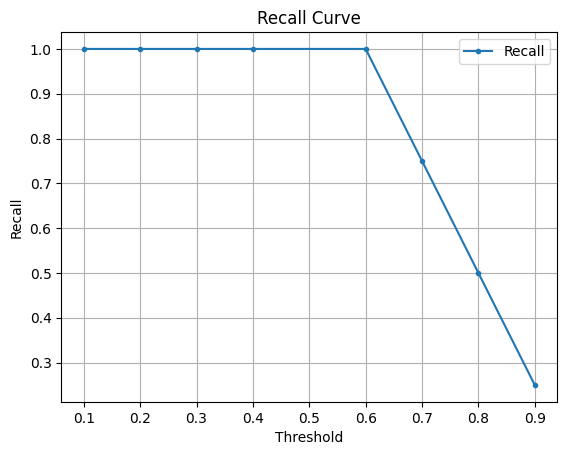

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve


def plot_recall_curve(y_true, y_pred_prob):
    """Plots the recall curve for binary classification.

    Args:
        y_true (array-like): True binary labels (0 or 1).
        y_pred_prob (array-like): Predicted probabilities for the positive class.
    """

    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)

    plt.plot(thresholds, recall[:-1], marker='.', label='Recall')  # Recall vs. Threshold
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.title('Recall Curve')
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage:
# Assuming you have y_true (true labels) and y_pred_prob (predicted probabilities)
y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1])
y_pred_prob = np.array([0.2, 0.8, 0.3, 0.9, 0.7, 0.1, 0.4, 0.6])

plot_recall_curve(y_true, y_pred_prob)

 F1-Score Graph

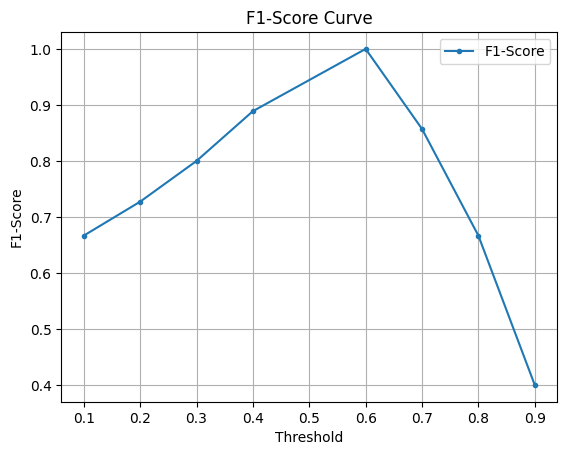

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score


def plot_f1_score_curve(y_true, y_pred_prob):
    """Plots the F1-score curve for binary classification.

    Args:
        y_true (array-like): True binary labels (0 or 1).
        y_pred_prob (array-like): Predicted probabilities for the positive class.
    """

    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score for each threshold

    plt.plot(thresholds, f1_scores[:-1], marker='.', label='F1-Score')  # F1-score vs. Threshold
    plt.xlabel('Threshold')
    plt.ylabel('F1-Score')
    plt.title('F1-Score Curve')
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage:
# Assuming you have y_true (true labels) and y_pred_prob (predicted probabilities)
y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1])
y_pred_prob = np.array([0.2, 0.8, 0.3, 0.9, 0.7, 0.1, 0.4, 0.6])

plot_f1_score_curve(y_true, y_pred_prob)

Confusion Matrix.

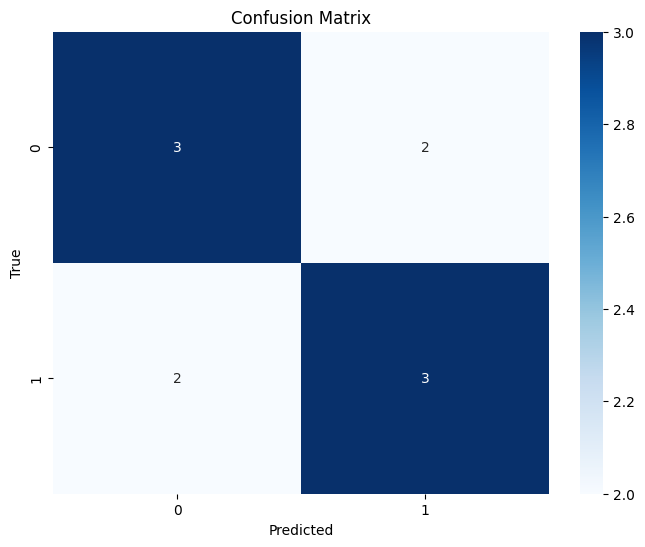

Confusion Matrix:
[[3 2]
 [2 3]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume you have your true labels (y_true) and predicted labels (y_pred)
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]  # Example true labels
y_pred = [1, 1, 1, 0, 0, 1, 1, 0, 0, 0]  # Example predicted labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)